<a href="https://colab.research.google.com/github/psophis/NeuralNetworks/blob/main/NeuralNetworks_Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1

Paula Isbrecht (592446)

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
dataset = pd.read_csv('/content/drive/MyDrive/Neuronale_Netze/Homework_1/insurance.csv')
dataset.head()

Mounted at /content/drive


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Charts

Visualizing the data as it is in the given dataset.

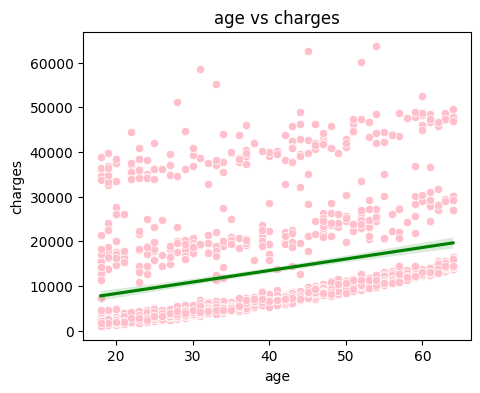

In [ ]:
plt.figure(figsize=(5, 4))
sns.scatterplot(data=dataset, x='age', y='charges', color='pink')
sns.regplot(data=dataset, x='age', y='charges', color='green', scatter=False)
plt.xlabel('age')
plt.ylabel('charges')
plt.title('age vs charges')
plt.show()

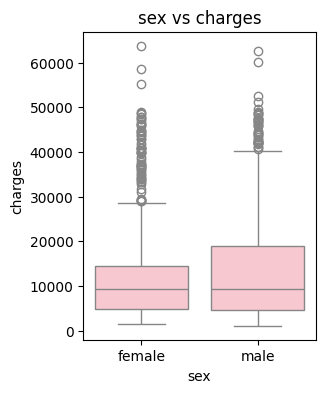

In [ ]:
plt.figure(figsize=(3, 4))
sns.boxplot(data=dataset, x='sex', y='charges', color='pink')
plt.xlabel('sex')
plt.ylabel('charges')
plt.title('sex vs charges')
plt.show()

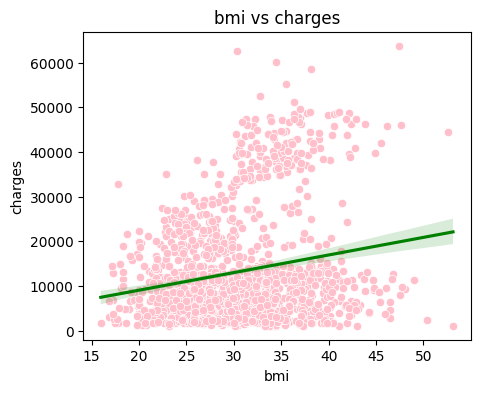

In [ ]:
plt.figure(figsize=(5, 4))
sns.scatterplot(data=dataset, x='bmi', y='charges', color='pink')
sns.regplot(data=dataset, x='bmi', y='charges', color='green', scatter=False)
plt.xlabel('bmi')
plt.ylabel('charges')
plt.title('bmi vs charges')
plt.show()

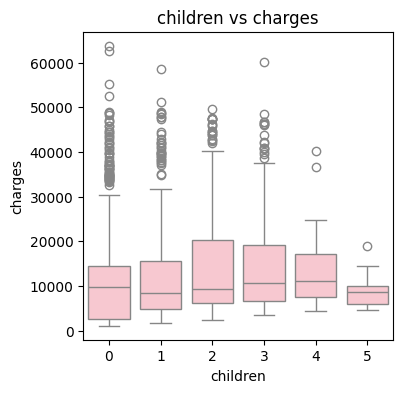

In [ ]:
plt.figure(figsize=(4, 4))
sns.boxplot(data=dataset, x='children', y='charges', color='pink')
plt.xlabel('children')
plt.ylabel('charges')
plt.title('children vs charges')
plt.show()

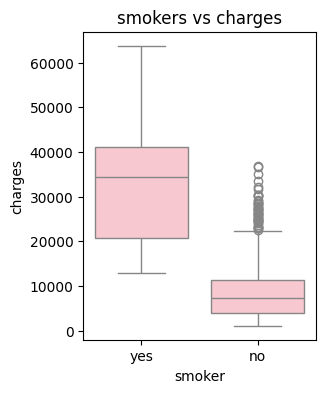

In [ ]:
plt.figure(figsize=(3, 4))
sns.boxplot(data=dataset, x='smoker', y='charges', color='pink')
plt.xlabel('smoker')
plt.ylabel('charges')
plt.title('smokers vs charges')
plt.show()

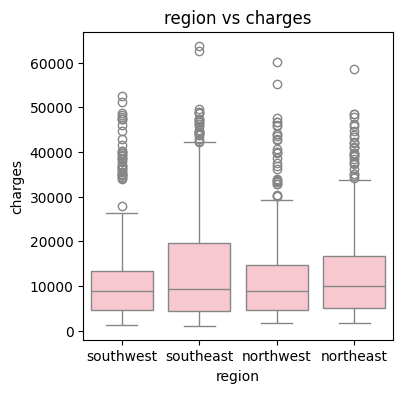

In [ ]:
plt.figure(figsize=(4, 4))
sns.boxplot(data=dataset, x='region', y='charges', color='pink')
plt.xlabel('region')
plt.ylabel('charges')
plt.title('region vs charges')
plt.show()

## Linear Regression Model

### Data preparation

In [ ]:
# Convert categorical features
dataset_encoded = pd.get_dummies(dataset, drop_first=True)
X_encoded = dataset_encoded
X_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


### Definition of input and target

In [ ]:
X = X_encoded.drop('charges', axis=1) # exclude 'charges' column
y = dataset_encoded['charges']
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False


### Split data for training and testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Creation and training of the model

In [ ]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train, y_train)
lin.score(X_train, y_train)

0.7417255854683333

In [ ]:
y_pred = lin.predict(X_test)

### Evaluation Linear Regression

####General overview: actual vs predicted values

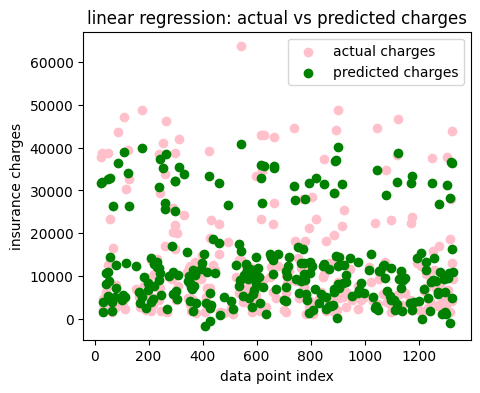

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(y_test.index, y_test, color='pink', label='actual charges')
plt.scatter(y_test.index, y_pred, color='green', label='predicted charges')
plt.xlabel("data point index")
plt.ylabel("insurance charges")
plt.title("linear regression: actual vs predicted charges")
plt.legend()
plt.show()

The model seems to predict the tightly clustered values >0 and <20,000 well but struggles with the values >40,000.

#### Residual plot

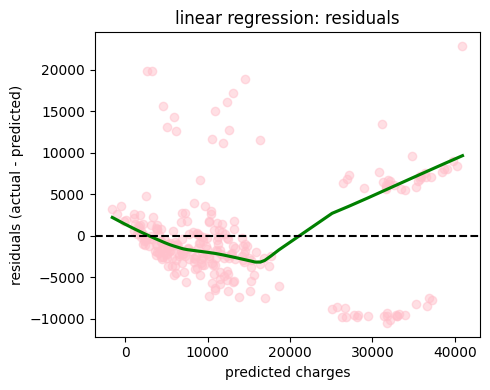

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(5,4))
plt.scatter(y_pred, residuals, color='pink', alpha=0.5)
sns.regplot(x=y_pred, y=residuals, scatter=False, lowess=True, color='green')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("predicted charges")
plt.ylabel("residuals (actual - predicted)")
plt.title("linear regression: residuals")
plt.tight_layout()
plt.show()

Ideally, the difference between the actual and the predicted values should be low, so the residuals should be scattered around the zero line. Here, however the curve almost displays a V-shape. Above the line, at below ~5,000 and over ~20,000 the model is underpredicting: the predicted values are significantly smaller than the actual ones. Between ~5,000 and ~20,000 it is the other way around.

#### Quantifying performance

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (testing): {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Error: {r2}')

Mean Absolute Error (testing): 4181.19447375365
Mean Squared Error: 33596915.85136145
R^2 Error: 0.7835929767120724


#### Learning curve

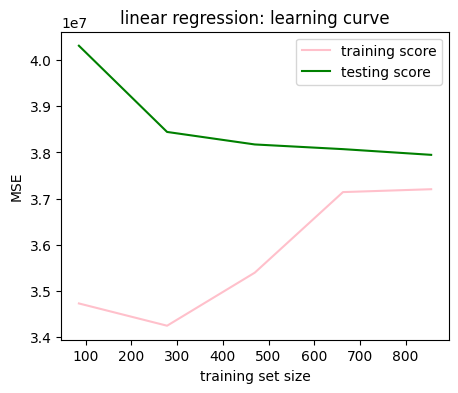

In [ ]:
# Data of the learning curve
train_sizes, train_scores, test_scores = learning_curve(lin, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Mean scores of testing and training
train_scores_mean_lin = -train_scores.mean(axis=1)
train_std  = train_scores.std(1)
test_scores_mean_lin = -test_scores.mean(axis=1)

# Plotting the curve
plt.figure(figsize=(5,4))
plt.plot(train_sizes, train_scores_mean_lin, label='training score', color='pink')
plt.plot(train_sizes, test_scores_mean_lin, label='testing score', color='green')
plt.title('linear regression: learning curve')
plt.ylabel('MSE')
plt.xlabel('training set size')
plt.legend()
plt.show()

## Creation and training of the Polynomial Regression Model

### Data preparation

In [ ]:
# Adding polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

#### Split data for training and testing

In [ ]:
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

#### Scaling the features

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1), copy=True, clip=False)
X_poly_train_scaled = scaler.fit_transform(X_poly_train)
X_poly_test_scaled = scaler.transform(X_poly_test)

### Creation and training of the model

In [ ]:
lin_poly = LinearRegression()
lin_poly.fit(X_poly_train, y_poly_train)

LinearRegression()

In [ ]:
y_poly_pred = lin_poly.predict(X_poly_test)

### Evaluation Polynomial Regression

####General overview: actual vs predicted values

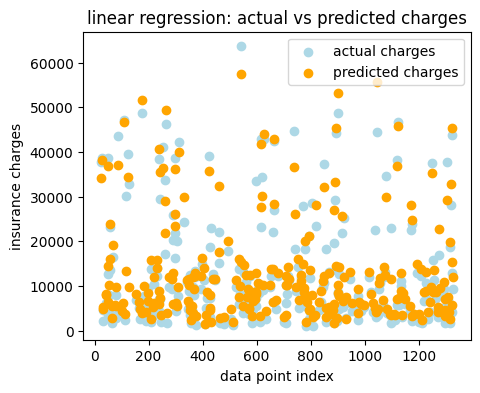

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(y_poly_test.index, y_poly_test, color='lightblue', label='actual charges')
plt.scatter(y_poly_test.index, y_poly_pred, color='orange', label='predicted charges')
plt.xlabel("data point index")
plt.ylabel("insurance charges")
plt.title("linear regression: actual vs predicted charges")
plt.legend()
plt.show()

At first glance, this model seems to handle the densely clustered values >0 and < 20,000 equally as well as those >20,000.

#### Residual plot

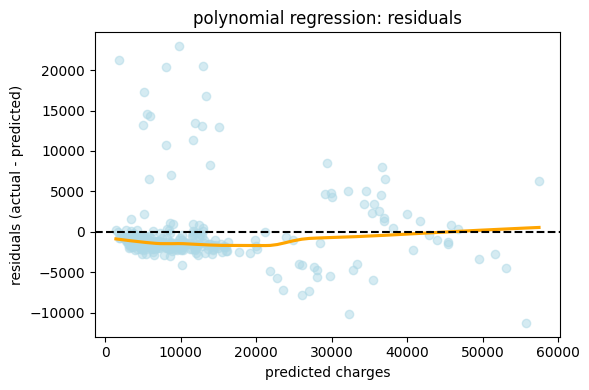

In [ ]:
residuals = y_poly_test - y_poly_pred
plt.figure(figsize=(6,4))
plt.scatter(y_poly_pred, residuals, color='lightblue', alpha=0.5)
sns.regplot(x=y_poly_pred, y=residuals, scatter=False, lowess=True, color='orange')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("predicted charges")
plt.ylabel("residuals (actual - predicted)")
plt.title("polynomial regression: residuals")
plt.tight_layout()
plt.show()

With a 2nd degree polynomial, the curve gets rather close to the zero line. The model isn't gravely over- or underpredicting in comparison to the linear regression. There is still a dip ca. between 10,000 and 25,000 though.

#### Quantifying performance

In [ ]:
mae_poly = mean_absolute_error(y_poly_test, y_poly_pred)
mse_poly = mean_squared_error(y_poly_test, y_poly_pred)
r2_poly = r2_score(y_poly_test, y_poly_pred)

print(f'Mean Absolute Error (testing): {mae_poly}')
print(f'Mean Squared Error: {mse_poly}')
print(f'R^2 Error: {r2_poly}')

Mean Absolute Error (testing): 2729.50013363945
Mean Squared Error: 20712805.9879185
R^2 Error: 0.8665830903164832


#### Learning curve

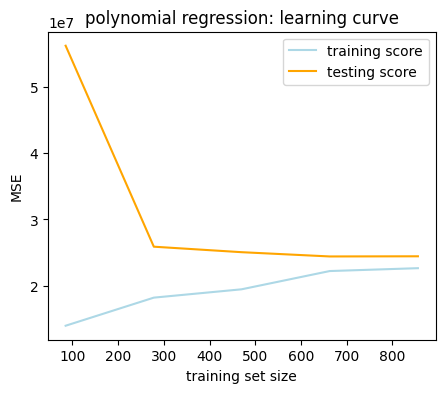

In [ ]:
# Data of the learning curve
train_sizes, train_scores, test_scores = learning_curve(lin_poly, X_poly_train, y_poly_train, cv=5, scoring='neg_mean_squared_error')

# Mean scores of testing and training
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

# Plotting the curve
plt.figure(figsize=(5,4))
plt.plot(train_sizes, train_scores_mean, label='training score', color='lightblue')
plt.plot(train_sizes, test_scores_mean, label='testing score', color='orange')
plt.title('polynomial regression: learning curve')
plt.ylabel('MSE')
plt.xlabel('training set size')
plt.legend()
plt.show()